In [1]:
# a new dataset to work on
import pandas as pd

In [2]:
temp=pd.read_csv('Documents/New folder/temporal.csv')
temp.head(10)

,Mes,data science,machine learning,deep learning,categorical
0,2004-01-01,12,18,4,1
1,2004-02-01,12,21,2,1
2,2004-03-01,9,21,2,1
3,2004-04-01,10,16,4,1
4,2004-05-01,7,14,3,1
5,2004-06-01,9,17,3,1
6,2004-07-01,9,16,3,1
7,2004-08-01,7,14,3,1
8,2004-09-01,10,17,4,1
9,2004-10-01,8,17,4,1


In [3]:
# we will look at how the data is distributed, the min, max,mean and the rest..
temp.describe()

,data science,machine learning,deep learning,categorical
count,194.000000,194.000000,194.000000,194.000000
mean,20.953608,27.396907,24.231959,0.257732
std,23.951006,28.091490,34.476887,0.438517
min,4.000000,7.000000,1.000000,0.000000
25%,6.000000,9.000000,2.000000,0.000000
50%,8.000000,13.000000,3.000000,0.000000
75%,26.750000,31.500000,34.000000,1.000000
max,100.000000,100.000000,100.000000,1.000000


### python code for displaying large datasets
```python
pd.set_option('display.max_rows', 500)
pd.set_option('display max_columns, 500')
pd.set.set_option('display.width',1000)
```
- these are just parameters used

In [4]:
# getting more information when viewing data : the currency, date, decimals, hours, etc
# it doe not chagnge the data
format_dict={'data csience':'${0:,.2f}',
'Mes':'{:%m-%y}',
'machine learning':'{:.2%}'}
#make sure that month column has datetime format
temp['Mes']=pd.to_datetime(temp['Mes'])
# we apply the style to visualization
#Simplified format dictionary with values that do make sense for our data
temp.head().style.format(format_dict).highlight_max(color='darkgreen').highlight_min(color='#ff0000')

,Mes,data science,machine learning,deep learning,categorical
0,01-04,12,1800.00%,4,1
1,02-04,12,2100.00%,2,1
2,03-04,9,2100.00%,2,1
3,04-04,10,1600.00%,4,1
4,05-04,7,1400.00%,3,1


### Pandas profiling
- it is a library that generates interactive reports with our data, possible problems it might have, the types of data and the distribution

In [ ]:
pip install pandas-profiling

```python
# the disdavantage
# it can not be used with laarge datasets, therefore a sample that represents all
#categories is best to be used
from pandas_profiling import ProfileReport
prof=ProfileReport(temp)
prof.to_file(output_file='report.html')
prof.to_notebook(output_file='report.html')
- for a sample dataset
prof=ProfileReport(temp.sample(n=1000))
```



In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

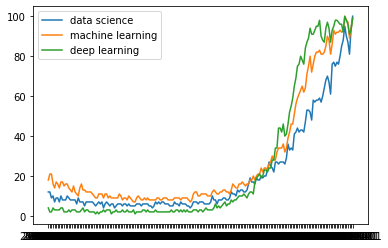

In [7]:
plt.plot(temp['Mes'],temp['data science'],label='data science' )
plt.plot(temp['Mes'],temp['machine learning'],label='machine learning')
plt.plot(temp['Mes'], temp['deep learning'],label='deep learning')
plt.legend();



<Figure size 432x288 with 0 Axes>

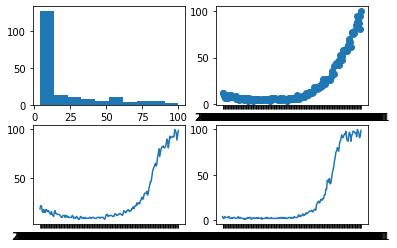

In [5]:
# multiple graphics
fig=plt.figure()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(temp['data science'])
axes[0,1].scatter(temp['Mes'],temp['data science'])
axes[1,0].plot(temp['Mes'],temp['machine learning'])
axes[1,1].plot(temp['Mes'],temp['deep learning']);

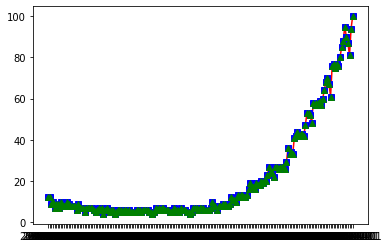

In [11]:
plt.plot(temp['Mes'],temp['data science'],'r-')
plt.plot(temp['Mes'],temp['data science'],'bs')
plt.plot(temp['Mes'],temp['data science'], 'g^');

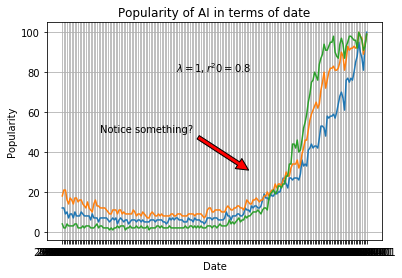

In [13]:
# adding text on the graph
plt.plot(temp['Mes'],temp['data science'],label='data science')
plt.plot(temp['Mes'],temp['machine learning'],label='machine learning')
plt.plot(temp['Mes'],temp['deep learning'],label='deep learning')
plt.xlabel('Date')
plt.ylabel('Popularity')
plt.title('Popularity of AI in terms of date')
plt.grid(True)
plt.text(x='2010-01-01',y=80,s=r'$\lambda=1,r^20=0.8$')  # coordinates use the same units as graphs
plt.annotate('Notice something?',xy=('2014-01-01',30),xytext=('2006-01-01',50),
             arrowprops={'facecolor':'red','shrink':0.05});

### Seaborn

In [14]:
import seaborn as sns

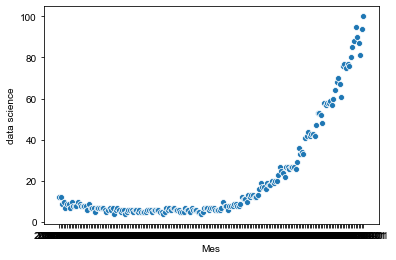

In [15]:
#we initialize with sns.set(),just like plt.show()
sns.scatterplot(temp['Mes'], temp['data science'])
sns.set()

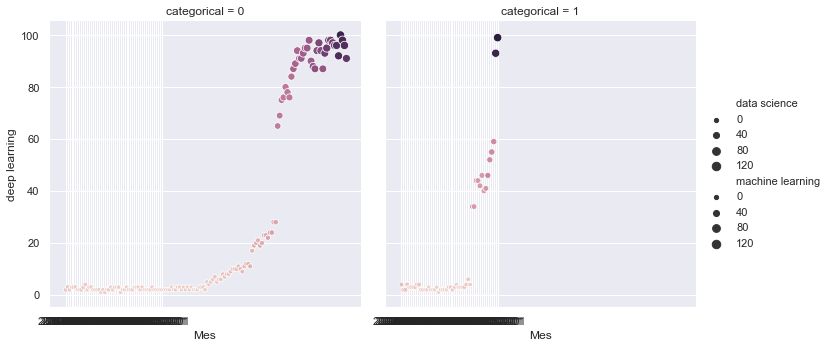

In [17]:
sns.relplot(x='Mes',y='deep learning',hue='data science',size='machine learning',col='categorical',data=temp)
sns.set()

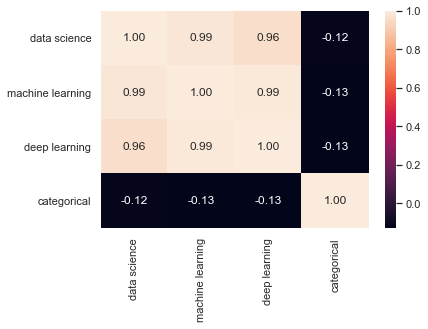

In [18]:
# this one gives all correlations between variables in a dataset
sns.heatmap(temp.corr(),annot=True,fmt='.2f')
sns.set()

C:\Users\betty123\OneDrive\Documents\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\betty123\OneDrive\Documents\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


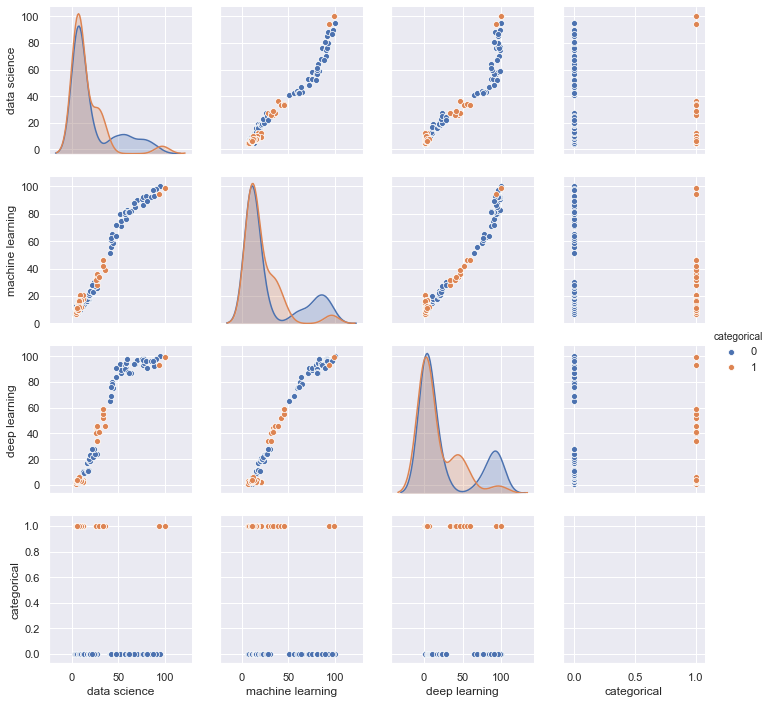

In [19]:
sns.pairplot(temp,hue='categorical')
sns.set()

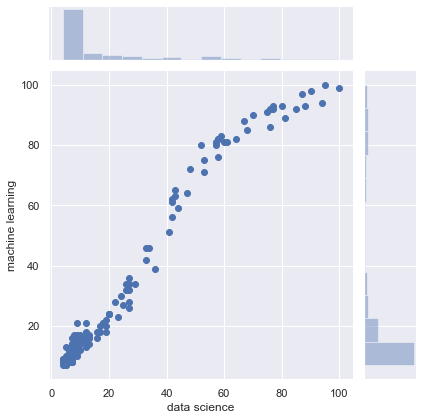

In [21]:
# very informative graph
sns.jointplot(x='data science',y='machine learning',data=temp)
sns.set()

In [28]:
from bokeh.plotting import figure,output_file,save
output_file('data_science_popularity.html')

In [29]:
p=figure(title='data science',x_axis_label='Mes',y_axis_label='data science')
p.line(temp['Mes'],temp['data science'],legend='popularity',line_width=2)
save(p)

'C:\\Users\\betty123\\data_science_popularity.html'